# Background

The goal is to build a search algorithm to find a random grain of rice. This will then be classified by variety before being binned to an orientation category. From here, the goal is to classify all images in each variety by orientation and display percentages and time involved.

The initial orientation binning will be vertical or not vertical, with vertical being defined as the grain within $\pm 30\degree$ of the vertical axis.

The dataset comes from [here](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset).

# Package Setup

# Data Import

# Model Setup
## Search Algorithm

## Classification Algorithm

## Orientation Algorithm

[Orientation example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

img = data.coins()
# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img)
mask = img > threshold
mask = morphology.remove_small_objects(mask, 50)
mask = morphology.remove_small_holes(mask, 50)
labels = measure.label(mask)

fig = px.imshow(img, binary_string=True)
fig.update_traces(hoverinfo='skip')  # hover is only for label info

props = measure.regionprops(labels, img)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']

# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            name=label_i,
            mode='lines',
            fill='toself',
            showlegend=False,
            hovertemplate=hoverinfo,
            hoveron='points+fills',
        )
    )

plotly.io.show(fig)

[ellipse example](https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html)

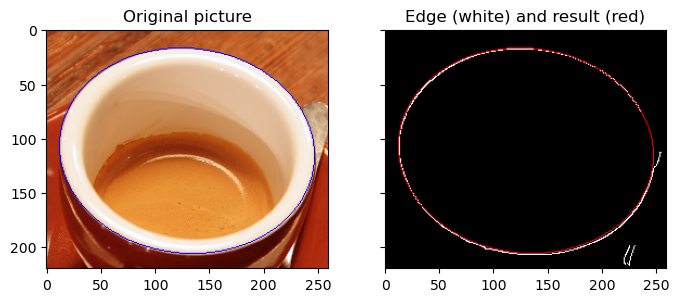

In [5]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.io import imread

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of the histogram for minor axis lengths.
# A higher `accuracy` value will lead to more ellipses being found, at the
# cost of a lower precision on the minor axis length estimation.
# A higher `threshold` will lead to less ellipses being found, filtering out those
# with fewer edge points (as found above by the Canny detector) on their perimeter.
result = hough_ellipse(edges, accuracy=20, threshold=250, min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

In [10]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.io import imread

# image_rgb = imread('Rice_Image_Dataset/Arborio/Arborio (6).jpg')
image_rgb = imread('Rice_Image_Dataset/Basmati/Basmati (12).jpg')


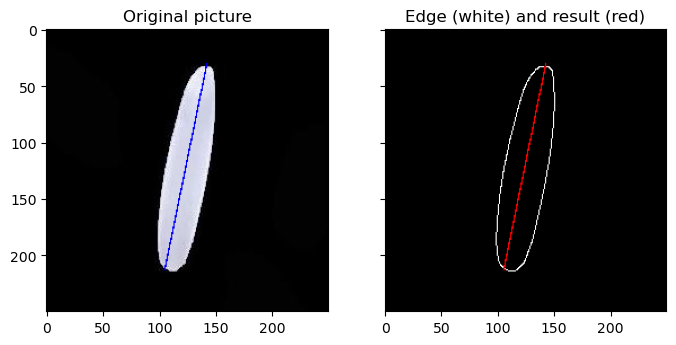

In [19]:
# image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of the histogram for minor axis lengths.
# A higher `accuracy` value will lead to more ellipses being found, at the
# cost of a lower precision on the minor axis length estimation.
# A higher `threshold` will lead to less ellipses being found, filtering out those
# with fewer edge points (as found above by the Canny detector) on their perimeter.
result = hough_ellipse(edges, accuracy=20, threshold=200)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

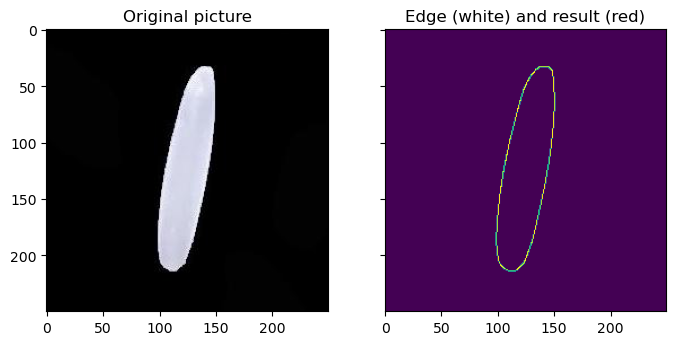

In [12]:
fig2, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()

In [17]:
result = hough_ellipse(edges, accuracy=10, threshold=200)